# EDA 
(dataset with sBERT embeddings)

<a href="https://colab.research.google.com/drive/1h17nNQP6UhEMFrCUXnU0gAL0OGN4Q8Qp?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## libs

In [ ]:
import os
from google.colab import drive
import pickle
from tqdm import tqdm

import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12,4)})

## loading data

In [ ]:
drive.mount('/content/drive')
path = "/content/drive/My Drive/comptech/comptech_opinion_analizer/code/embeddings_bert/"
os.listdir(path)

Mounted at /content/drive


['JoeBiden_0-100000.pickle',
 'JoeBiden_100000-200000.pickle',
 'JoeBiden_200000-300000.pickle',
 'JoeBiden_300000-400000.pickle',
 'JoeBiden_400000-500000.pickle',
 'Trump_0-100000.pickle',
 'Trump_100000-200000.pickle',
 'Trump_200000-300000.pickle',
 'Trump_300000-400000.pickle',
 'Trump_400000-500000.pickle',
 'Trump_500000-600000.pickle',
 'Trump_600000-700000.pickle']

loading 2 datasets: Trump and Biden

In [ ]:
biden_df = pd.DataFrame()
trump_df = pd.DataFrame()
tmp = pd.DataFrame()
for my_file in tqdm(os.listdir(path), position=0, leave=True):
  if my_file.split('_')[0] == 'JoeBiden':
    with open(path + my_file, mode='rb') as pandas_file:
      tmp = pickle.load(pandas_file)
      biden_df = biden_df.append(tmp)
  else:
    with open(path + my_file, mode='rb') as pandas_file:
      tmp = pickle.load(pandas_file)
      trump_df = trump_df.append(tmp)
del tmp

100%|██████████| 12/12 [01:08<00:00,  5.73s/it]


In [ ]:
print('trump', trump_df.shape)
print('biden', biden_df.shape)

trump (618858, 7)
biden (499528, 7)


In [ ]:
trump_df.head(2)

,author,body,created_utc,link_id,parent_id,score,embedding
0,khalabrakis,"Fighters... That means warrior, like people wh...",1577836803,t3_ei6h2x,t3_ei6h2x,1,"[0.36201936, -0.32239345, 0.21850784, 1.316984..."
1,Whopper_Jr,it is plausible that Republicans will never wi...,1577836806,t3_ei4ag7,t3_ei4ag7,1,"[0.92618763, 0.5766326, 0.2711937, 0.5262378, ..."


## Analysis

### Time

trump

In [ ]:
trump_df['time'] = list(map(datetime.utcfromtimestamp, trump_df['created_utc']))
trump_df['time'] = trump_df['time'].dt.round('d')
trump_df['month'] = trump_df['time'].apply(lambda x: x.month)

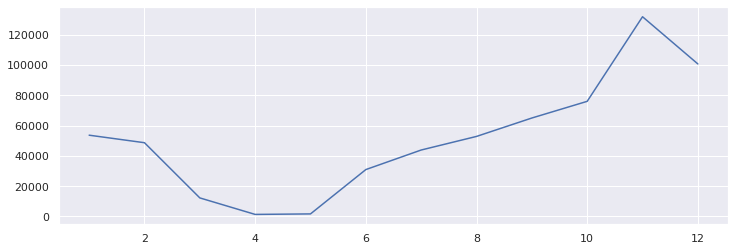

In [ ]:
plt.plot(trump_df.groupby('month')['author'].count())

biden

In [ ]:
biden_df['time'] = list(map(datetime.utcfromtimestamp, biden_df['created_utc']))
biden_df['time'] = biden_df['time'].dt.round('d')
biden_df['month'] = biden_df['time'].apply(lambda x: x.month)

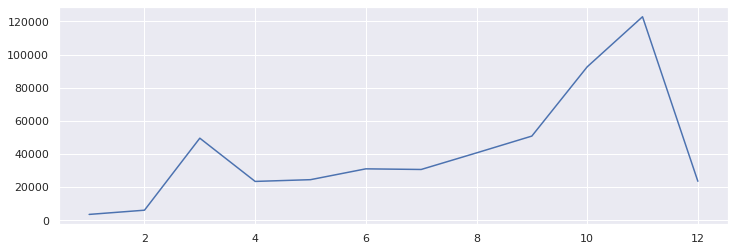

In [ ]:
plt.plot(biden_df.groupby('month')['author'].count())

### Score

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
trump_df.describe()

,created_utc,score
count,618858.00,618858.00
mean,1598321605.57,1.97
std,9460881.52,6.85
min,1577836803.00,-176.00
25%,1593943855.00,1.00
50%,1601479200.50,1.00
75%,1605567868.25,2.00
max,1609459753.00,1189.00


In [ ]:
biden_df.describe()

,created_utc,score
count,499528.00,499528.00
mean,1598066736.06,1.04
std,7668514.23,1.50
min,1577837280.00,-10.00
25%,1592502608.00,1.00
50%,1601141019.00,1.00
75%,1604462328.00,1.00
max,1609461313.00,308.00


In [ ]:
trump_df['score'] = trump_df['score'].astype('int16')
biden_df['score'] = biden_df['score'].astype('int16')

In [ ]:
trump_df['score'].value_counts(normalize=True)[:5]

1   0.62
2   0.11
3   0.06
0   0.05
4   0.03
Name: score, dtype: float64

In [ ]:
biden_df['score'].value_counts(normalize=True)[:5]

1   1.00
2   0.00
3   0.00
5   0.00
4   0.00
Name: score, dtype: float64

### Authors

authors who wrote 1, 10 and 100

In [ ]:
len(trump_df['author'].unique())

74090

In [ ]:
s = (trump_df['author'].value_counts() == 1)
authors_1 = list(s[s].index)
print(f"Authors who wrote only 1 comment: {(len(authors_1) / len(trump_df['author'].unique())) : .2%}")

for i in [1, 10, 100, 1000]:
  s = (trump_df['author'].value_counts() > i)
  authors = list(s[s].index)
  print(f"Authors who wrote more than {i} comments: {(len(authors)/len(trump_df['author'].unique())) : .2%}")

Authors who wrote only 1 comment:  43.19%
Authors who wrote more than 1 comments:  56.81%
Authors who wrote more than 10 comments:  12.43%
Authors who wrote more than 100 comments:  1.18%
Authors who wrote more than 1000 comments:  0.03%


In [ ]:
trump_df['author'].value_counts().describe()

count   74097.00
mean        8.35
std        40.45
min         1.00
25%         1.00
50%         2.00
75%         5.00
max      3777.00
Name: author, dtype: float64

In [ ]:
biden_df['author'].value_counts().describe()

count   49677.00
mean       10.06
std        54.39
min         1.00
25%         1.00
50%         2.00
75%         4.00
max      3931.00
Name: author, dtype: float64

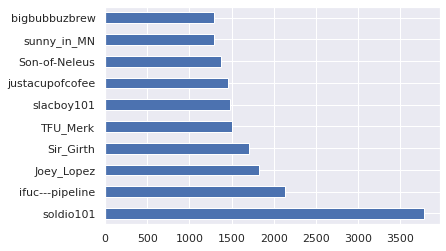

In [ ]:
trump_df['author'].value_counts()[:10].plot.barh()

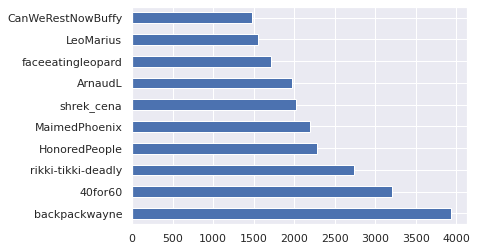

In [ ]:
biden_df['author'].value_counts()[:10].plot.barh()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


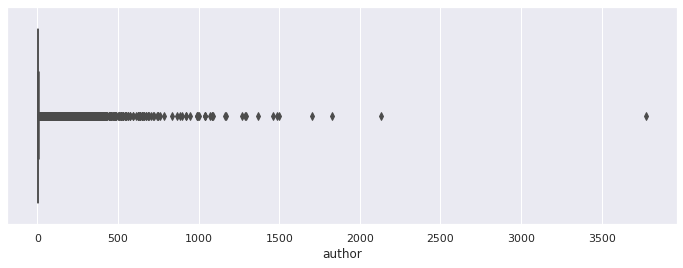

In [ ]:
sns.set(rc={'figure.figsize':(12,4)})
sns.boxplot(trump_df['author'].value_counts())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


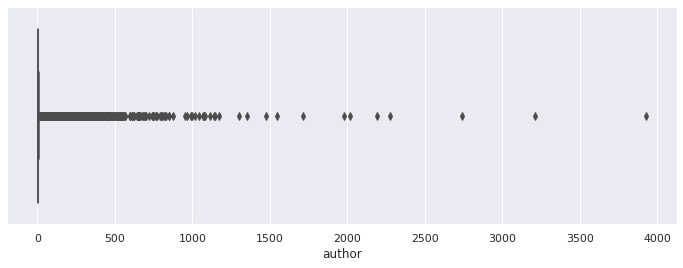

In [ ]:
sns.set(rc={'figure.figsize':(12,4)})
sns.boxplot(biden_df['author'].value_counts())

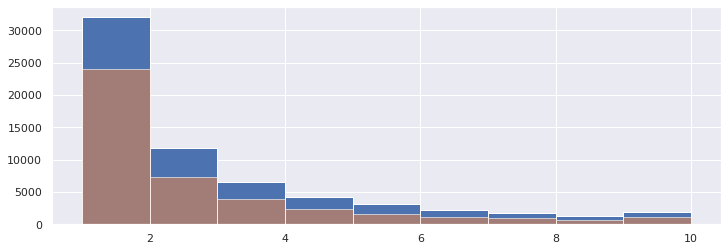

In [ ]:
trump_df['author'].value_counts().hist(bins=9, range=(1,10))
biden_df['author'].value_counts().hist(bins=9, range=(1,10), alpha=0.6)

####  leader-author

Interesting to check leader-author comments in time and how changed their opinion

- qty of comments for top authors through time

top authors in trump

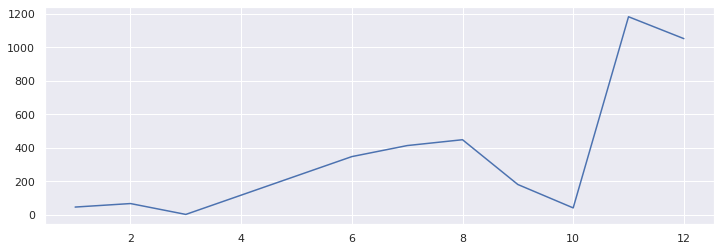

In [ ]:
plt.plot(trump_df[trump_df['author'] == 'soldio101']\
         .groupby('month')['author'].count())

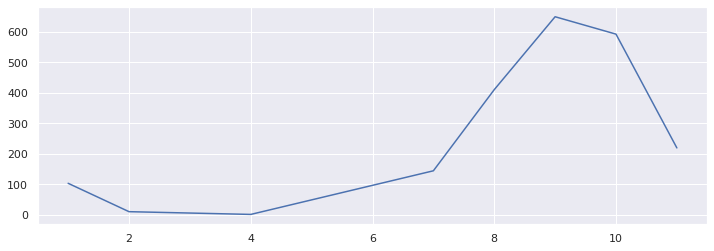

In [ ]:
plt.plot(trump_df[trump_df['author'] == 'ifuc---pipeline']\
         .groupby('month')['author'].count())

top authors in biden

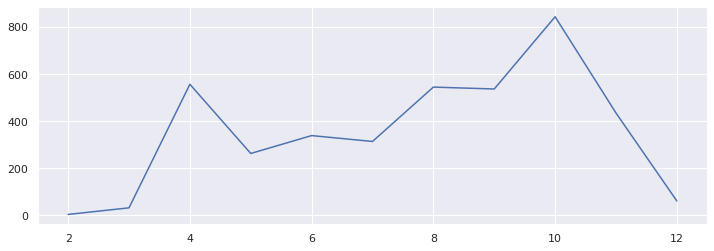

In [ ]:
plt.plot(biden_df[biden_df['author'] == 'backpackwayne']\
         .groupby('month')['author'].count())

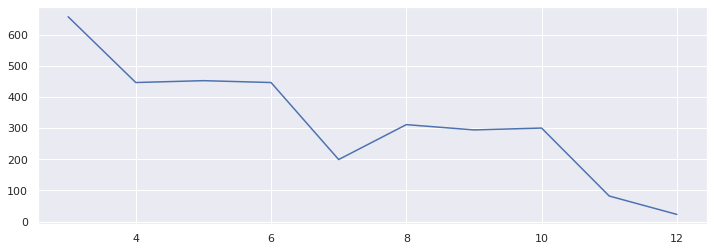

In [ ]:
plt.plot(biden_df[biden_df['author'] == '40for60']\
         .groupby('month')['author'].count())

- opinion dynamic for top authours through time

### Comments

Add column with comments length

In [ ]:
text_length = tqdm([_ for _ in map(len, trump_df['body'])])
trump_df['length'] = text_length
del text_length

100%|██████████| 618858/618858 [00:00<00:00, 2875276.19it/s]


In [ ]:
trump_df.describe()

,created_utc,score,length
count,618858.00,618858.00,618858.00
mean,1598321605.57,1.97,179.73
std,9460881.52,6.85,282.52
min,1577836803.00,-176.00,11.00
25%,1593943855.00,1.00,58.00
50%,1601479200.50,1.00,101.00
75%,1605567868.25,2.00,195.00
max,1609459753.00,1189.00,9984.00


In [ ]:
text_length = tqdm([_ for _ in map(len, biden_df['body'])])
biden_df['length'] = text_length
del text_length

100%|██████████| 499528/499528 [00:00<00:00, 2941381.18it/s]


In [ ]:
biden_df.describe()

,created_utc,score,length
count,499528.00,499528.00,499528.00
mean,1598066736.06,1.04,187.54
std,7668514.23,1.50,265.41
min,1577837280.00,-10.00,11.00
25%,1592502608.00,1.00,64.00
50%,1601141019.00,1.00,114.00
75%,1604462328.00,1.00,215.00
max,1609461313.00,308.00,9972.00


в среднем комменты содержать 15-30 слов

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


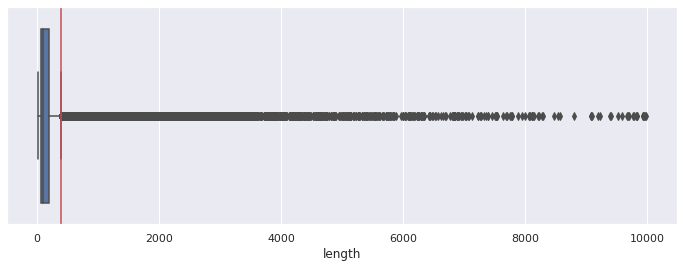

In [ ]:
sns.boxplot(trump_df['length'])
plt.axvline(400, color='r')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


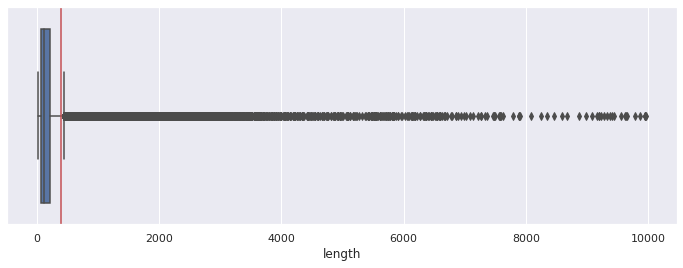

In [ ]:
sns.boxplot(biden_df['length'])
plt.axvline(400, color='r')

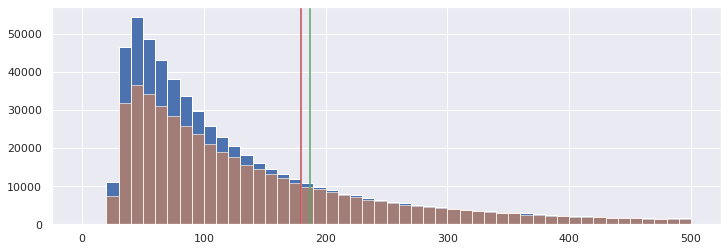

In [ ]:
trump_df['length'].hist(bins=50, range=(0,500))
plt.axvline(trump_df['length'].mean(), color='r')
biden_df['length'].hist(bins=50, range=(0,500), alpha=0.6)
plt.axvline(biden_df['length'].mean(), color='g')

доля комментов более 1000 символов (более 150-200 слов)

In [ ]:
print(f"Доля комментов в сообществе Трампа более 1000 знаков: {len(trump_df[trump_df['length'] > 1000]) / len(trump_df):.2%}")

Доля комментов в сообществе Трампа более 1000 знаков: 1.57%


In [ ]:
print(f"Доля комментов в сообществе Байдена более 1000 знаков: {len(biden_df[biden_df['length'] > 1000]) / len(biden_df):.2%}")

Доля комментов в сообществе Байдена более 1000 знаков: 1.40%


In [ ]:
trump_df[trump_df['length'] < 20]['body']

4150             T of P K E K
12276     . . . love it . . .
13047           M A G A A G A
24668       Sum Dum Gai . . .
25806       ##M I N I M I K E
                 ...         
602203    Can I cop a on this
607437    I have to DM it tho
607534          L I B T A R D
609198         C r y m of r e
616320       F you C K of F F
Name: body, Length: 80, dtype: object

In [ ]:
trump_df = trump_df[trump_df['length'] > 20]
biden_df = biden_df[biden_df['length'] > 20]

In [ ]:
pd.options.display.max_colwidth = 4000
trump_df[trump_df['length'] > 4000][['body', 'author']]

,body,author
744,"Happy New Year! Well since you asked, maybe some bedtime reading for you here. How many times have you heard that ""impeachment does not require a crime""? See it sort of like Impeachment in the Constitution literally written *(Treason, Bribery, or other high Crimes and misdemeanors*) requires to charge a *High Crime, High Crime, or other high Crime and (lesser) crimes*, for the House to have the power of Impeachment; and yet volumes of nonsense are written about justifying ignoring/stretching/lying about this sentence/fact of Impeachment requiring a crime; and thus abusing the Constitution without citing a crime, and using past abuses/violations/caselaw to justify continued violations. So Yang will cite, Rubio/Cruz, Rubio/Cruz will cite… going back and back, listing everyone who is violated the Constitution on the topic and gotten away with it; but it does not change the facts in the Constitution's extra requirement for POTUS vs any other office. Well I can only speculate as to why others do not say it, but from my experiences in life: 1. Most people do not read the Constitution.2. Most people and even most people in law or history or politics do not read through nearly the entirety of laws and piles of Case laws (including ones which they themselves cite).3. Writing that link is like writing a legal brief, in that people will respond with this argument/court ruling/amendments/case law/*Federalist Papers*/etc. and so it is a relatively big task; for something which most people will find pointless since they realize most of these ineligible candidates will not get their party's nomination at the convention anyhow.4. Most lawyers, judges, and law professors (like the 4 Constitutional scholars testifying) do not actually believe in the Constitution as written. Overall I would say it is about 70% do not, but of course that means some places the % is much higher than others.5. Corruptions of the most basic elements of American law. Such as citing Case Law as if it was Law (this is how many bar exam essays are written to pass rather than citing the Constitution, in fact if you look at for instance the CA bar exam, by far the most popular, the essays require citing case law which violates the Constitution as a default position); and citing Case Law in Constitutional Matters is particularly wrong since no Case Law, just as no congressional law, can trump or override the US Constitution. One long and particularly corrupting practice is consulting *The Federalist Papers* (and particularly the least wise Hamilton) as if they are part of the Constitution or American Law, which they are not.6. The Ashwander Rules/Guidelines were put in place by I am going to the worst Justice in American History. It basically tells the courts to NOT do their job aka ruling things unConstitutional, so this is key to how the unConstitutional case law goalposts and new legislation gets created over these nearly 100 years.7. Mass importation of non-Americans into (higher) education, including law schools; means instead of foreigners learning American law, American law gets shifted to global, parliamentary or other systems. So like you hear from Yang or Bernie or others saying things like ""well other countries have \_\_\_\_\_\_, why not the USA"" as in Universal Healthcare, VoterIDs, VAT Tax, etc. And this then gets applied to other areas of laws including things like international treaties and then injected unconstitutionally into US laws/court rulings/etc. or injected ""legally"" like removing our American First to Invent Patent System under 44, and put in place the globalist First to File Patent System. Or the ""Platform vs Publisher"" nonsense also is a two-law system common in parliamentary systems, but not legal in America. Other countries do NOT have our American legal framework, where the gov needs our permission rather than people needing the gov's permission slips to do things; or where we do not have nobility, and all citizens are

In [ ]:
pd.options.display.max_colwidth = 20